# Handwritten Letter Recognition

## Importing Libraries

In [1]:
# General purpose libraries
import os
import matplotlib.pyplot as plt
import numpy as np

# Import Tensorflow model and layers
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## Loading and Scaling Images

In [2]:
letters = 'abcdefghijklmnopqrstuvwxyz'

def prepare_data(letters, path = './data', oversampling=1):
    
    # Image data and classes
    mnist_x = []
    mnist_y = []

    for number, letter in enumerate(list(letters)):
        # Open a directory with current letter
        for image in os.listdir(path+'/'+letter):
            # read png only
            if image[-3:] == 'png': 
                # Reading image into array, taking only Alpha channel in RGBA
                mnist_x.append(plt.imread(path+'/'+letter+'/'+image)[:,:,3])
                # Adding class according to the letter, like so: 0 => 'A', 1 => 'B'...
                mnist_y.append(number)

    # Saving both as numpy array
    mnist_x = np.array(mnist_x)
    mnist_y = np.array(mnist_y)

    return mnist_x, mnist_y

In [3]:
def scale(arr):
    arr = (arr - arr.min()) / (arr.max() - arr.min())
    return arr

In [4]:
mnist_x, mnist_y = prepare_data(letters)
mnist_x = scale(mnist_x)

print('Input shape:', mnist_x.shape)
print('Output shape:', mnist_y.shape)

Input shape: (2740, 28, 28)
Output shape: (2740,)


## Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.1, random_state=42)

## Keras Model

In [8]:
clear_session()

model = Sequential()

model.add(Conv1D(filters=28, kernel_size=2, strides=1, activation='relu', input_shape=(28, 28)))
model.add(MaxPooling1D(1))

model.add(Conv1D(filters=28, kernel_size=1, strides=1, activation='relu'))
model.add(MaxPooling1D(1))

model.add(Conv1D(filters=28, kernel_size=1, strides=1, activation='relu'))
model.add(MaxPooling1D(1))

model.add(Conv1D(filters=28, kernel_size=1, strides=1, activation='relu'))
model.add(MaxPooling1D(1))

model.add(Conv1D(filters=28, kernel_size=1, strides=1, activation='relu'))
model.add(MaxPooling1D(1))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(letters), activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(0.001),
    metrics=['accuracy'],
)

In [9]:
#model.summary()

## Training and Evaluation

Epoch 1/5
78/78 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9976
Epoch 2/5
78/78 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 3/5
78/78 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4/5
78/78 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/5
78/78 [==============================] - 0s 3ms/step - loss: 8.7331e-04 - accuracy: 1.0000


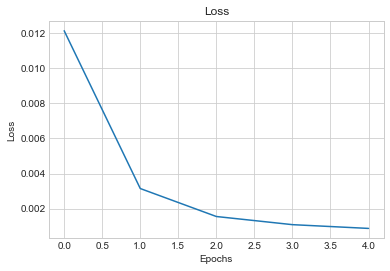

Model accuracy on Train: 1.0
Model accuracy on Test: 0.8394160583941606


In [13]:
history = model.fit(X_train, y_train, epochs=5, verbose=1)

plt.style.use('seaborn-whitegrid')
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

y_pred = np.argmax(model.predict(X_train), axis=-1)
print('Model accuracy on Train:',accuracy_score(y_train, y_pred))

y_pred = np.argmax(model.predict(X_test), axis=-1)
print('Model accuracy on Test:',accuracy_score(y_test, y_pred))

In [12]:
#confusion_matrix(y_test, y_pred)

## Saving

In [14]:
model.save('model.h5')

## Exporting to TensorflowJS

Converter will create `model.json` and `group1-shard1of1.bin` files

In [ ]:
# pip install tensorflowjs

In [ ]:
# tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model ./model.h5 ./app/

## Load TensorflowJS

In [ ]:
const model = null;
async function loadModel() {
    model = await tf.loadLayersModel('./model.json');
}

loadModel();